#Logistic Regression with TF-IDF
## Data

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data = pd.read_csv("full_data.csv")

In [ ]:
data.head()

,cuisine,ingredients
0,greek,romaine lettuce black olive grape tomato garli...
1,southern_us,plain flour pepper salt tomato black pepper ...
2,filipino,egg pepper salt mayonaise cooking oil green ch...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallot cornflour cayenne pepper ...


In [ ]:
ingredients = data['ingredients']
cuisine = data["cuisine"]

##TF-IDF

In [ ]:
vec = TfidfVectorizer()
vec.fit(ingredients)
data_tfidf = vec.transform(ingredients)

##Splitting

In [ ]:
from sklearn.model_selection import train_test_split
train_data_tfidf, test_data_tfidf, train_cuisine, test_cuisine = train_test_split(data_tfidf, cuisine, test_size=0.1, random_state=1)

##Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(train_data_tfidf,train_cuisine)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
predictions = lr.predict(test_data_tfidf)

##Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import preprocessing
from sklearn.svm import SVC

scoring = ['accuracy']
clf = SVC(kernel='linear')
scores = cross_validate(clf, train_data_tfidf, train_cuisine, scoring=scoring, cv=9, return_train_score=False)
print(scores)

{'fit_time': array([ 93.4084549 ,  98.86974597,  98.9069109 ,  99.90241766,
        99.22447491,  98.11436963,  98.41186786,  98.9990325 ,
       101.74880195]), 'score_time': array([16.19343042, 17.04998922, 16.38844824, 16.84446478, 16.36701775,
       17.07265377, 16.65408325, 16.86471701, 16.86693525]), 'test_accuracy': array([0.78093561, 0.79320755, 0.79018868, 0.77761006, 0.78465409,
       0.78339623, 0.78767296, 0.78716981, 0.79522013])}


In [ ]:
acc_cv = [0.78093561, 0.79320755, 0.79018868, 0.77761006, 0.78465409,
       0.78339623, 0.78767296, 0.78716981, 0.79522013]
sum(acc_cv)/len(acc_cv)

0.7866727911111111

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_cuisine, predictions))

              precision    recall  f1-score   support

   brazilian       0.87      0.51      0.64        53
     british       0.66      0.46      0.54        87
cajun_creole       0.80      0.74      0.77       138
     chinese       0.82      0.87      0.84       281
    filipino       0.66      0.62      0.64        74
      french       0.58      0.64      0.61       245
       greek       0.84      0.70      0.77       124
      indian       0.84      0.92      0.88       295
       irish       0.76      0.56      0.64        68
     italian       0.81      0.90      0.85       816
    jamaican       0.95      0.67      0.78        54
    japanese       0.84      0.75      0.79       138
      korean       0.82      0.80      0.81        76
     mexican       0.91      0.92      0.92       635
    moroccan       0.86      0.72      0.79        94
     russian       0.64      0.36      0.46        39
 southern_us       0.74      0.85      0.79       435
     spanish       0.66    

In [ ]:
from sklearn.metrics import log_loss
lr_probs = lr.predict_proba(test_data_tfidf)
loss = log_loss(test_cuisine, lr_probs)
loss

0.7353392664350772

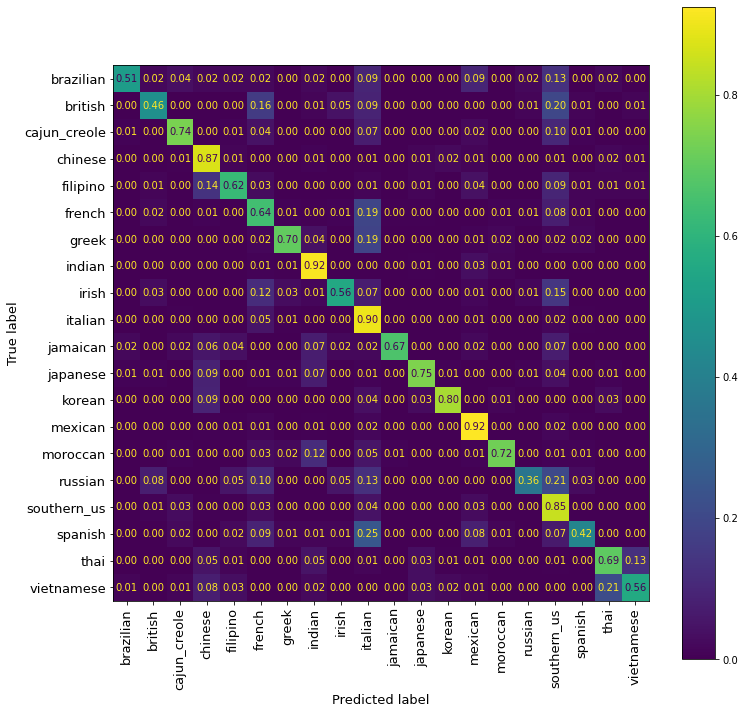

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
labels = np.unique(train_cuisine)

conf_mat = confusion_matrix(test_cuisine, predictions, labels, normalize = "true")
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
fig, ax = plt.subplots(figsize=(12,12))
cmd.plot(ax=ax,values_format = '.2f')
ax.tick_params(axis='x', rotation=90)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)
fig.savefig('LRconf_mat.png')